# 1) Importing Dependencies

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
import pickle
from scipy import stats
%matplotlib inline

# 2) Loading The Data Into A Dataframe

## 2.1) Description of dataset
Source : http://lib.stat.cmu.edu/datasets/boston

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

In [2]:
#loading data from csv into a dataframe
boston_ds = pd.read_csv("dataset/BostonHousing.csv")

# 3) Basic Data Information

In [3]:
boston_ds.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston_ds.shape

(506, 14)

### Observation:</br>
- Attributes : crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat</br>
- Target Variable : medv<br>
- There are 14 columns and 506 rows in the given dataset 

In [5]:
# To check if there are any null/missing values
boston_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# Stastical Summary of dataset
boston_ds.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#Checking for missing values
boston_ds.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### Observation:<br>
- There are no null/missing values in the given dataset.<br>
- chas, rad and tax are the only two attributes which are integers rest all are float.<br>
- Column 'zn' (proportion of residential land zoned for lots over 25,000 sq.ft.) has 0 for 25th and 50th percentiles.<br>
- Column 'chas' (Charles River dummy variable 1: 1 if tract bounds over river and 0 otherwise) has 0 for 25th, 50th and 75th percentiles.<br>
- For column 'zn' and 'chas' the above 2 observations can be understood as the variables are conditional + categorical variable.<br>
- Initial plan seems to favour the idea that these columns might not be useful in regression task of predicting 'medv'(Median Value of owner occupied homes).<br>
- The maximumm value of column 'medv' is interesting as according to data description it appears to be censored at 50.0(which corresponds to a median price of 50,000$), so on this basis values above 50.0 might not help in predicting 'medv'.

# 4) Exploratory Data Analysis

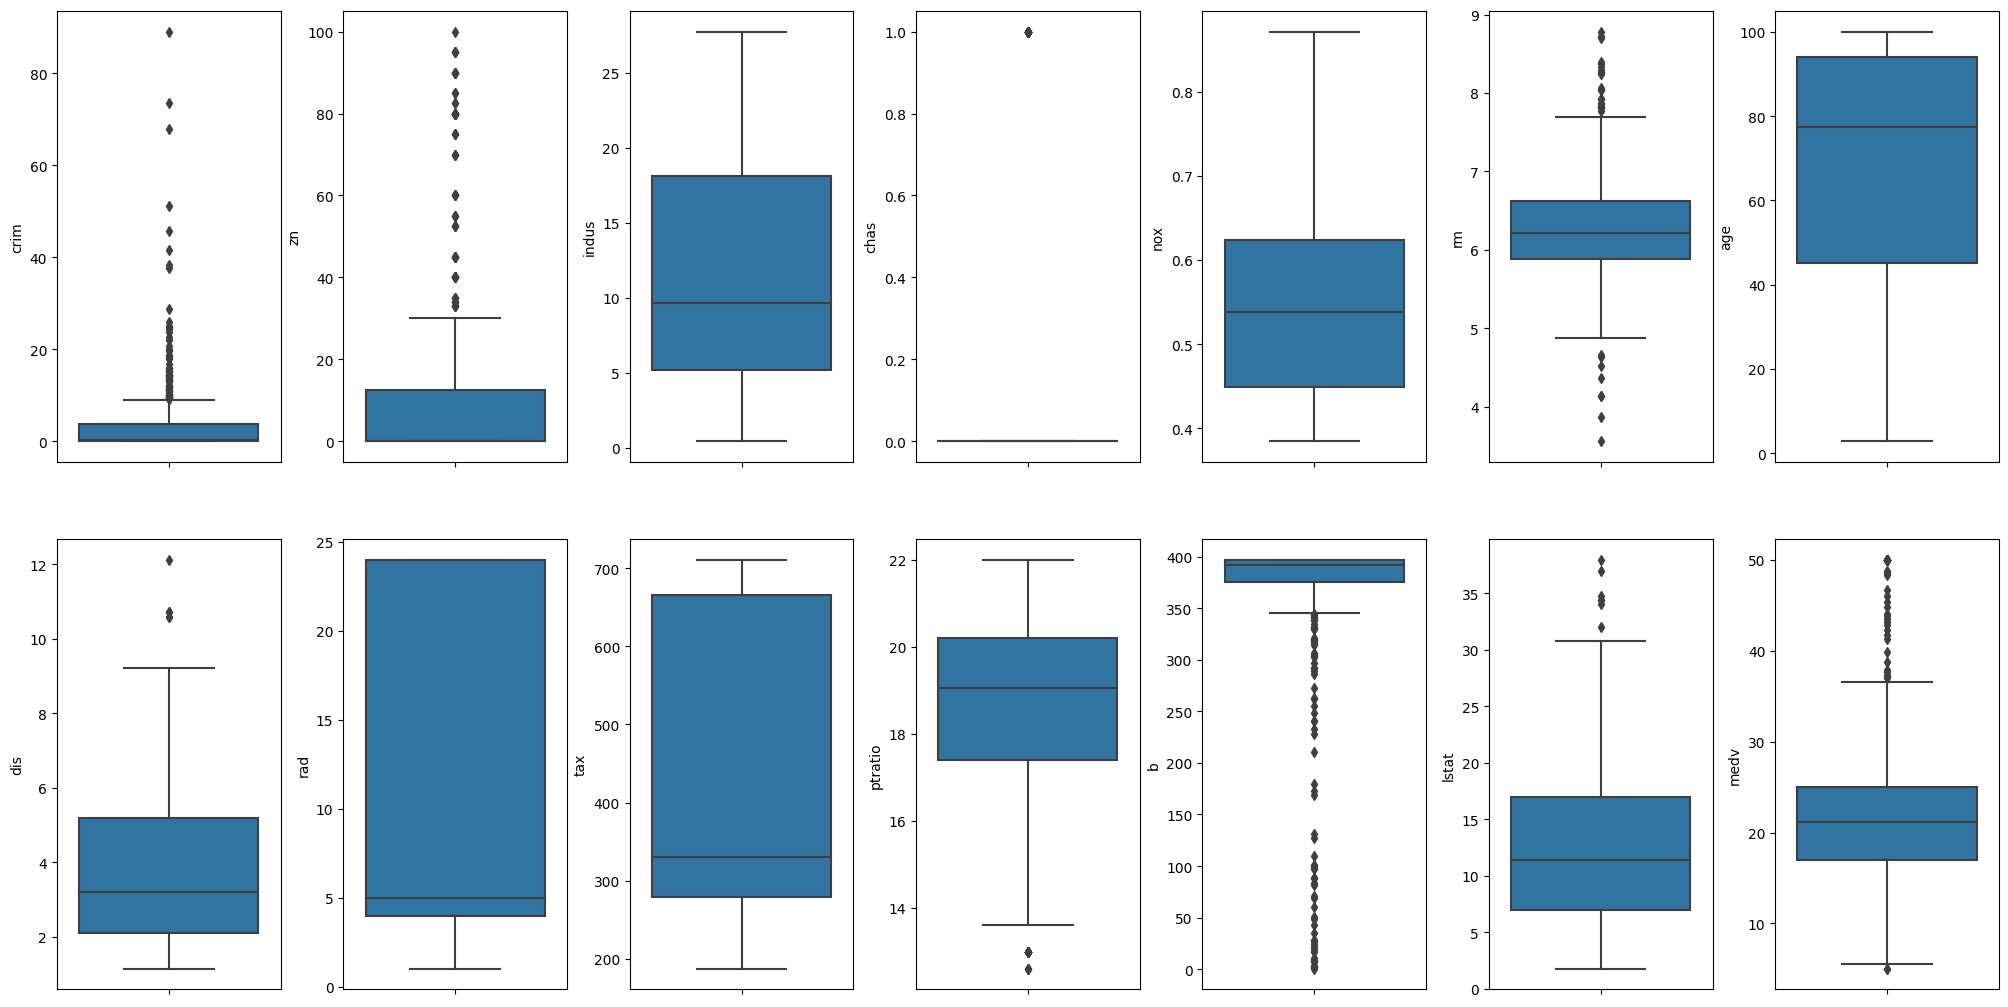

In [10]:
# Plotting Box plots to visualize each column in order to identify outliers (if any)
fig,axs = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in boston_ds.items():
    sns.boxplot(y=k, data = boston_ds, ax = axs[index])
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Observation:
- The following columns have outliers: crim, zn, rm, b, medv<br>
- Before dealing with outliers we need to see what percent of them are actually present in the data

In [19]:
# Code to find percentage of outliers in each column
for i,j in boston_ds.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    iqr = q3 - q1 # Inter Quartile Range
    v_col = j[(j <= q1 - 1.5 * iqr) | (j >= q3 + 1.5 * iqr)]
    percent = np.shape(v_col)[0] * 100 / np.shape(boston_ds)[0]
    print("%s outlier = %.2f%%" % (i.upper(),percent))

CRIM outlier = 13.04%
ZN outlier = 13.44%
INDUS outlier = 0.00%
CHAS outlier = 100.00%
NOX outlier = 0.00%
RM outlier = 5.93%
AGE outlier = 0.00%
DIS outlier = 0.99%
RAD outlier = 0.00%
TAX outlier = 0.00%
PTRATIO outlier = 2.96%
B outlier = 15.22%
LSTAT outlier = 1.38%
MEDV outlier = 7.91%


### Observation:
- The above cell provides information about what percent of column data is outlier.<br>
- The target variable is 'medv', so we remove outlier from this column so we can have best predictions later on.

In [20]:
# Removing outliers from 'medv' column
boston_ds = boston_ds[~(boston_ds['medv'] >= 50.0)]
print(np.shape(boston_ds))

(490, 14)


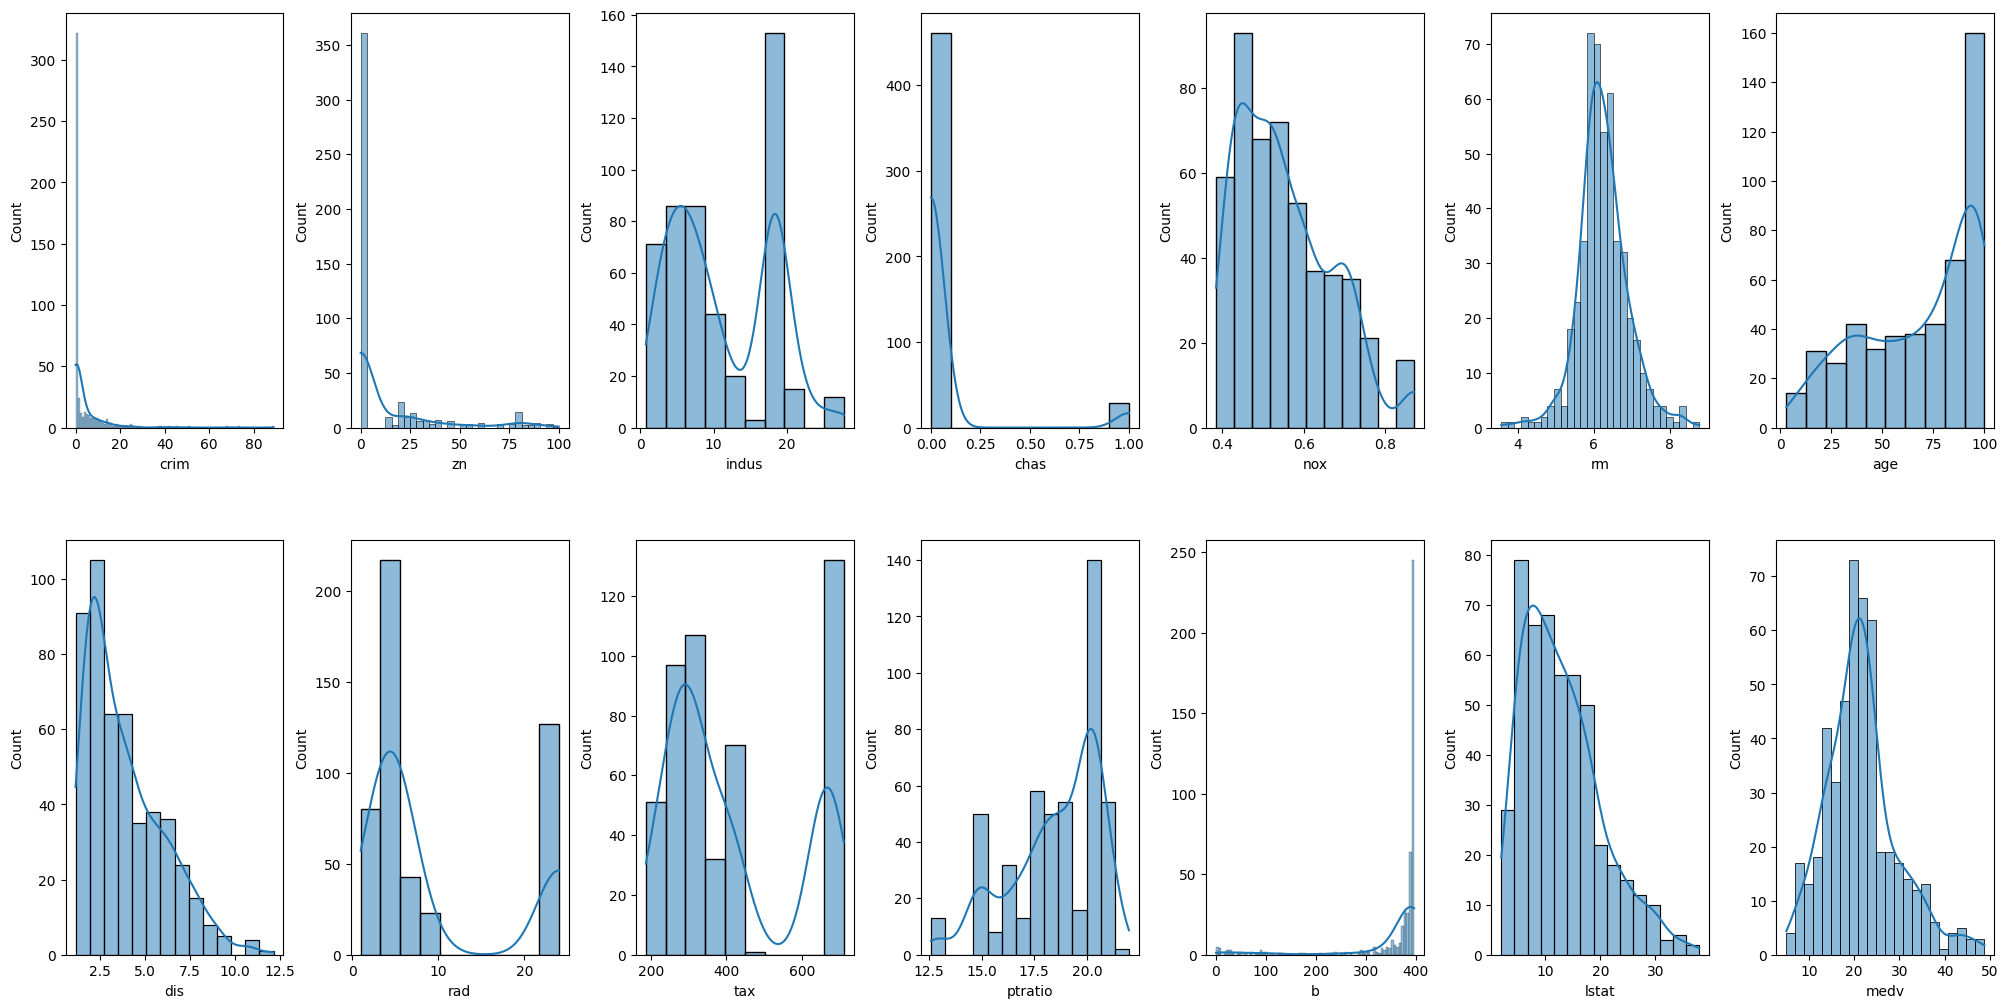

In [31]:
# After removing 'medv' outliers code snippet to view the current status of all the parameters
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_ds.items():
    sns.histplot(v, ax=axs[index],kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Observation:
- crim, zn, b are highly skewed distributions.<br>
- 'medv' now has a near normal distribution.<br>
- Other parameters seem to have a normal or bimodel distribution except for 'chas' which is a discrete variable.<br>

<AxesSubplot:>

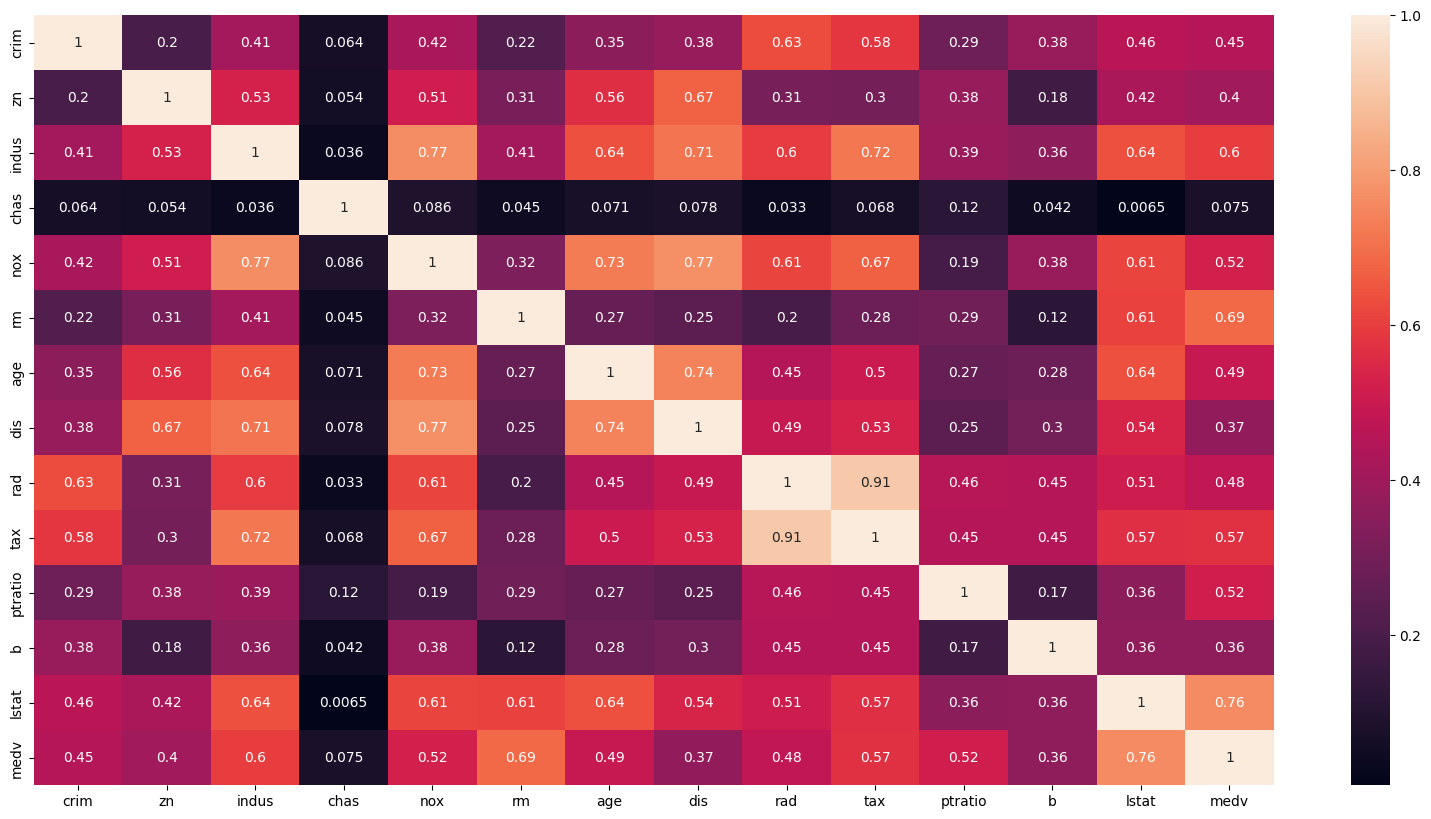

In [33]:
# Pair wise correlation between all the parameters using heat map
plt.figure(figsize=(20, 10))
sns.heatmap(boston_ds.corr().abs(),  annot=True) #boston_ds.corr() By default it gives pearson correlation

### Observation:
- 'tax' and 'rad' are highly correlated features.<br>
- Following columns: lstat, indus, rm, tax, nox, ptratio; have a good correlation score with 'medv' being >0.5 which makes them good parameters to be used for predictions.<br>

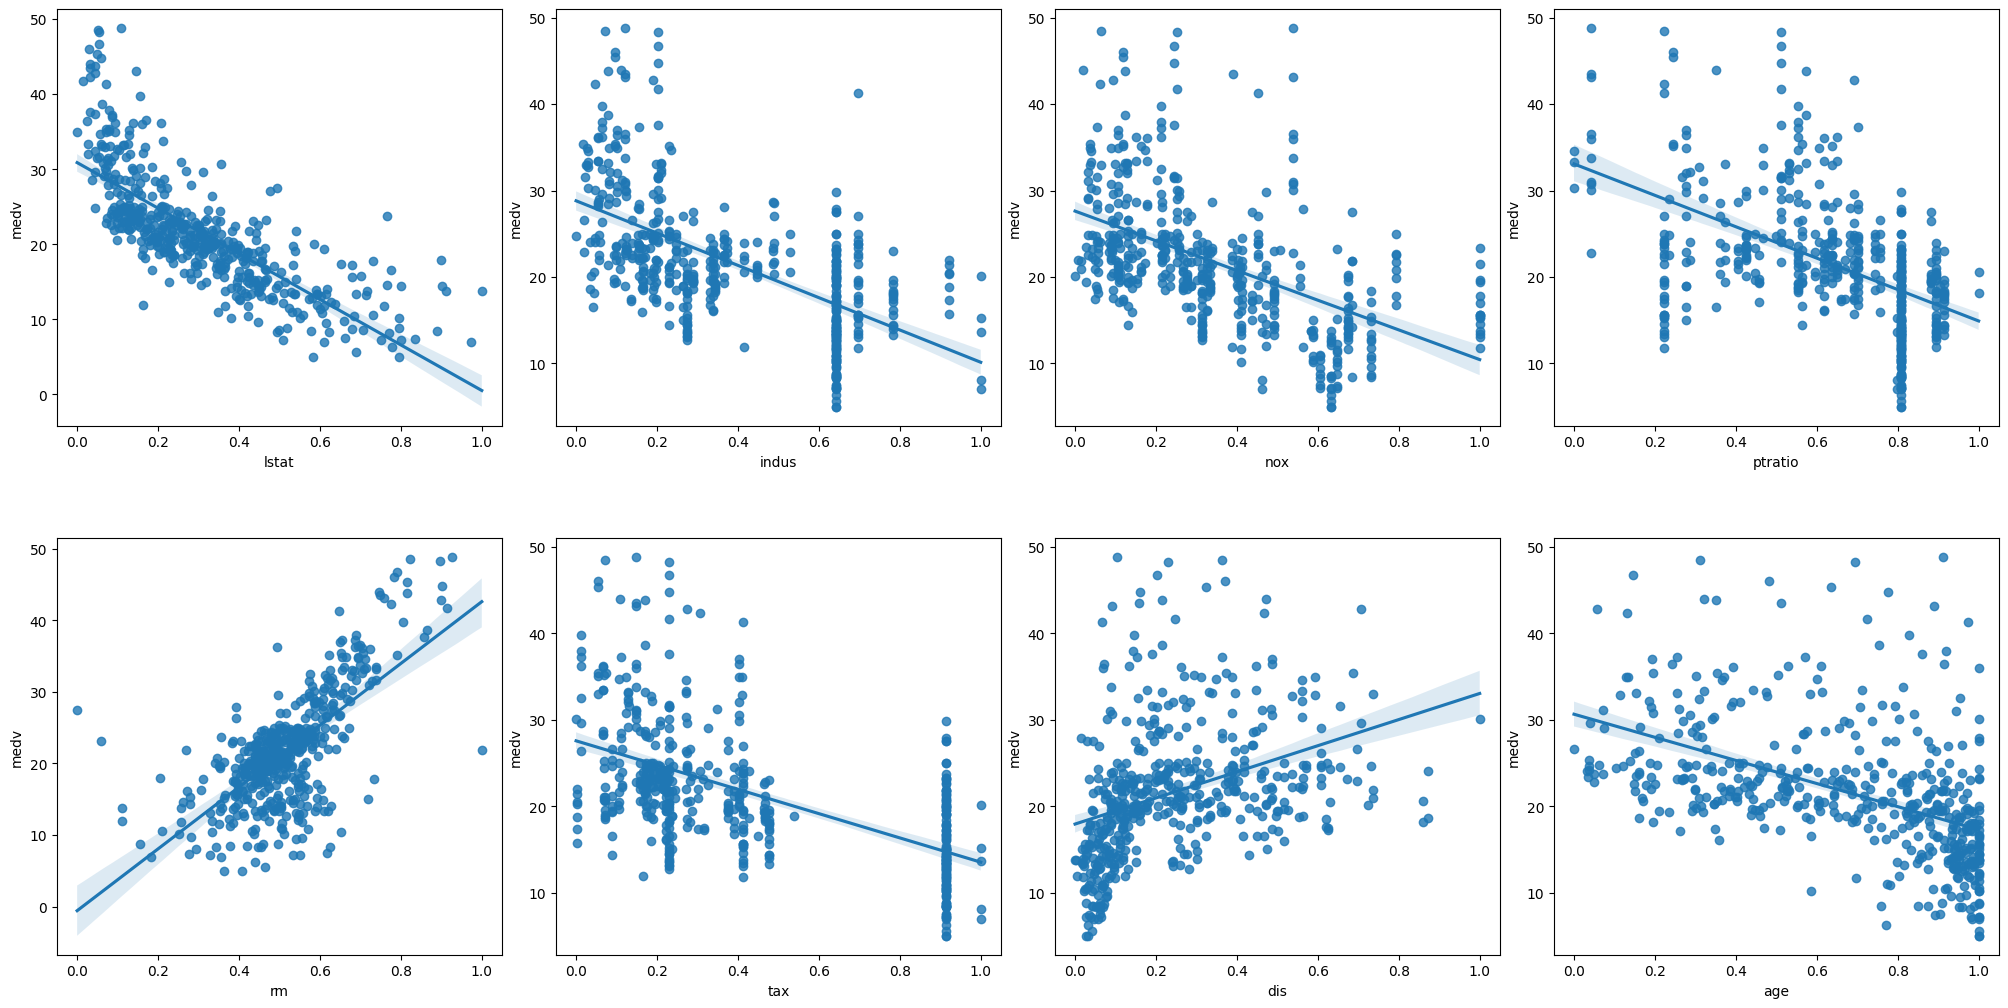

In [35]:
# Code snippet to look at the possible regressiion line that we can get while training the model
# scaling the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age']
x = boston_ds.loc[:,column_sels]
y = boston_ds['medv']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# 5) Model Training

In [16]:
# Independent and dependent features
x = boston_ds.iloc[:,:-1]
y = boston_ds.iloc[:,-1]

In [18]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [20]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [23]:
# Train test Split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
X_Train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13


In [25]:
Y_Train.head()

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
Name: medv, dtype: float64

In [26]:
X_Test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27


In [27]:
Y_Test.head()

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: medv, dtype: float64

In [29]:
# Standardizing the dataset
scaler = StandardScaler()

In [30]:
X_Train = scaler.fit_transform(X_Train)

In [31]:
X_Test = scaler.transform(X_Test)

In [33]:
regression=LinearRegression()

In [34]:
regression.fit(X_Train,Y_Train)

LinearRegression()

In [35]:
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [36]:
print(regression.intercept_)

23.01581920903955


In [37]:
#On which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [39]:
# Prediction with test data
reg_pred = regression.predict(X_Test)

In [40]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

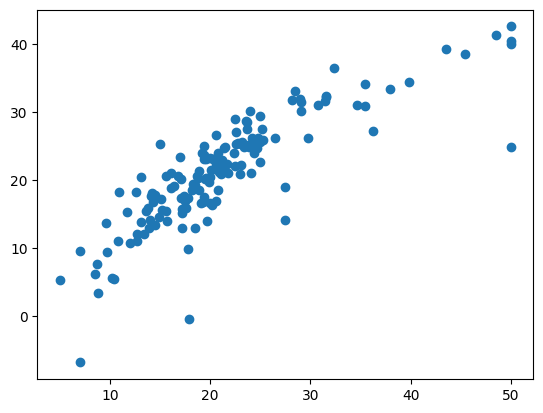

In [41]:
# Scatter plot for prediction
plt.scatter(Y_Test,reg_pred)

In [42]:
# Error
residuals = Y_Test - reg_pred

In [43]:
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: medv, Length: 152, dtype: float64

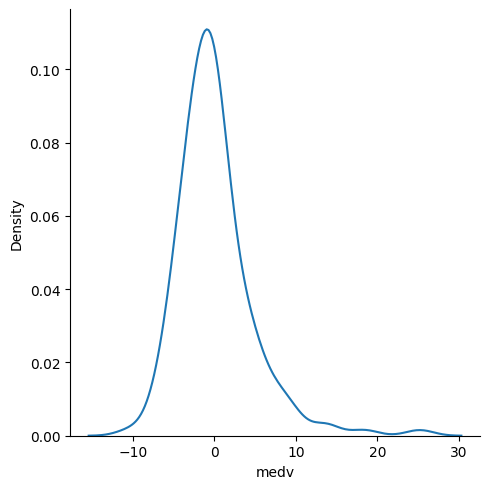

In [44]:
#plotting the residuals
sns.displot(residuals,kind="kde")

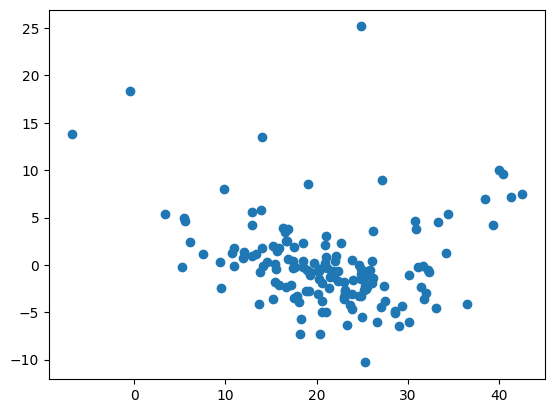

In [45]:
# Scatter plot between prediction and residuals
plt.scatter(reg_pred,residuals)

In [48]:
# Performance metrics for the model
print(mean_absolute_error(Y_Test,reg_pred))
print(mean_squared_error(Y_Test,reg_pred))
print(np.sqrt(mean_squared_error(Y_Test,reg_pred)))

3.1627098714574053
21.517444231177205
4.6386899261728205


## R square and adjusted R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [50]:
score = r2_score(Y_Test,reg_pred)
score

0.7112260057484934

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [51]:
#display adjusted R-squared
1 - (1-score)*(len(Y_Test)-1)/(len(Y_Test)-X_Test.shape[1]-1)

0.6840226584639312

# 6) New Data Prediction

In [63]:
X_Test[0].reshape(1,-1)

array([[-0.406801  , -0.50512499, -1.02225586, -0.28154625, -0.40521827,
         0.12577051,  0.55383118, -0.52734802, -0.51436915, -0.66777595,
        -0.74457062,  0.41241246, -0.47605794]])

In [64]:
scaler.transform(X_Test[0].reshape(1,-1))

D:\Boston House Price Prediction\BHP_dep\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.46684151, -0.52749891, -1.75430529, -1.36081455, -8.25262577,
        -8.63262276, -2.4703269 , -2.0222175 , -1.15351183, -2.45184812,
        -8.44094644, -4.13918731, -1.8159044 ]])

In [65]:
regression.predict(scaler.transform(X_Test[0].reshape(1,-1)))

D:\Boston House Price Prediction\BHP_dep\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([39.04510117])

# 7) Pickling the model file for deployment

In [69]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [71]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [72]:
pickled_model.predict(scaler.transform(X_Test[0].reshape(1,-1)))

D:\Boston House Price Prediction\BHP_dep\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([39.04510117])